<a href="https://colab.research.google.com/github/Simeonone/sentiment-analysis/blob/main/NLP_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Simeon Kengere Osiemo
# Registration Number: P60/42924/2022
# Natural Language Processing Assignment
# Question Three

In [ ]:
#IMPORTING LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#importing dataset from google colab
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('skincare').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

# Convert to a DataFrame
df = pd.DataFrame.from_records(rows)

# Drop rows with missing values
df.dropna(inplace=True)

# Print the resulting DataFrame
print(df)


                                                      0  \
0                                          Review_Title   
1                                               Perfect   
2                                         You need this   
3                                            Clean skin   
4                                      Love This Stuff!   
...                                                 ...   
4146                     I would buy this product again   
4147        Gentle exfoliant- leaves skin smooth & soft   
4148  One of my favorite skincare products of all time.   
4149                                            Ehhh...   
4150                                This is the best!!!   

                                                      1               2  \
0                                           Review_Text  Verified_Buyer   
1     Love using this on my face while in the shower...              No   
2     Even better than the daily microfoliant. I'm o...           

In [ ]:
print(df[1])


0                                             Review_Text
1       Love using this on my face while in the shower...
2       Even better than the daily microfoliant. I'm o...
3       Enjoy this product so much ! I look forward to...
4       I've never tried anything like this before and...
                              ...                        
4146                    Much better product than a scrub.
4147    I've been using this exfoliant for a few month...
4148          My skin looks better now than 10 years ago.
4149    This product was useless for me. I should've k...
4150    This product is amazing! It is the only thing ...
Name: 1, Length: 4151, dtype: object


In [ ]:
import string
import itertools
header_row = worksheet.row_values(1)
target_column = header_row.index("Review_Text") + 1

title_and_values = worksheet.col_values(target_column)

values = title_and_values[1:]

#converting to string
values_str = [str(x) for x in values]

# converting to lower case
values_lower = [x.lower() for x in values_str]

values_replace = []
for x in values_lower:
  values_replace.append(re.sub('[^a-zA-Z0-9]',' ',x))

#tokenization
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in values_replace]

# Remove punctuation
tokenized_sentences_no_punct = [[word for word in sentence if word not in string.punctuation] for sentence in tokenized_sentences]

# Remove stop words
stop_words = set(stopwords.words('english'))
tokenized_sentences_no_stopwords = [[word for word in sentence if word not in stop_words] for sentence in tokenized_sentences_no_punct]

# Perform stemming
stemmer = PorterStemmer()
tokenized_sentences_stemmed = [[stemmer.stem(word) for word in sentence] for sentence in tokenized_sentences_no_stopwords]

#print output after performing tokenization, removing punctuation, removing stop words, and performing stemming
join_tokenized_sentences_stemmed = []
for sentence in tokenized_sentences_stemmed:
  join_tokenized_sentences_stemmed.append(' '.join(sentence))


In [ ]:
print(join_tokenized_sentences_stemmed)

['love use face shower heat give light scrub nice', 'even better daili microfoli obsess skin much smoother', 'enjoy product much look forward use realli feel great', 'never tri anyth like love appli face get littl shot warm feel good scrub seem gritti side effect encount posit one', 'exfoli nice give smooth skin irrit reaction skin highli recommend buy', 'love use wet dri control abras leav face soft drench vitamin', 'absolut love', 'truli like multivitamin thermafoli product use last 7 year happi purchas directli sinc longer avail ulta store', 'definit love skin face feel better use', 'excel', 'love product exfoli skin', 'help dri winter face', 'use shower around twice weekli usual whilst wait condition soak exfoli bodi super sensit skin prone blotch oili zone product amaz thing skin hydrat slough dead skin cell caus zero irrit leav skin glow like realli deep facial live without makeup goe much smoother afterward also', 'great product alway feel gentli exfoli recommend', 'love dermalo

In [ ]:
!pip install vaderSentiment
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.5 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
values = join_tokenized_sentences_stemmed
print(len(values))

4150


In [ ]:
for i in range(0,4149):
  df[1][1:][i+1] = join_tokenized_sentences_stemmed[i]

In [ ]:
sia = SentimentIntensityAnalyzer()
df[10] = 'score'
df[10][1:] = df[1][1:].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
df[11] = 'sentiment'
df[11][1:] = df[10][1:].apply(lambda x: 1 if x>0 else 0)
print(df)

                                                     0   \
0                                          Review_Title   
1                                               Perfect   
2                                         You need this   
3                                            Clean skin   
4                                      Love This Stuff!   
...                                                 ...   
4146                     I would buy this product again   
4147        Gentle exfoliant- leaves skin smooth & soft   
4148  One of my favorite skincare products of all time.   
4149                                            Ehhh...   
4150                                This is the best!!!   

                                                     1               2   \
0                                           Review_Text  Verified_Buyer   
1       love use face shower heat give light scrub nice              No   
2     even better daili microfoli obsess skin much s...           

In [ ]:
df[11][1:].value_counts()

1    3506
0     644
Name: 11, dtype: int64

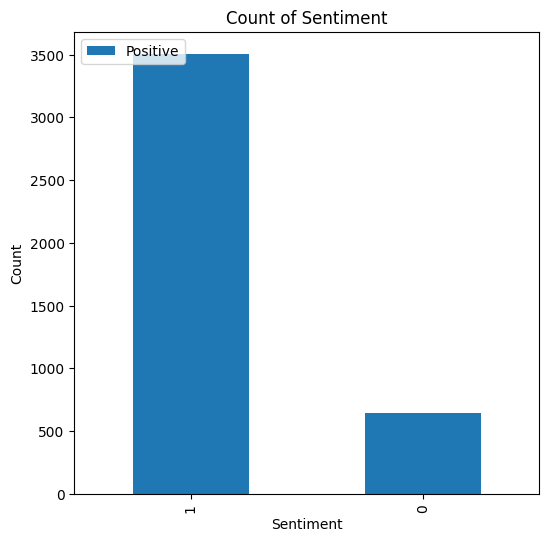

In [ ]:
import matplotlib.pyplot as plt

# Count the values in the 'sentiment' column and plot a bar graph
df[11][1:].value_counts().plot.bar(figsize=(6, 6), title='Count of Sentiment')

# Set the x-axis label
plt.xlabel('Sentiment')

# Set the y-axis label
plt.ylabel('Count')

# Set the legend
labels = ['Positive', 'Negative']
plt.legend(labels, loc=2)

# Display the plot
plt.show()


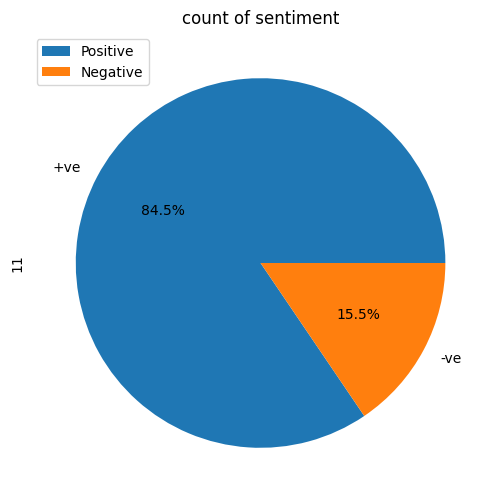

In [ ]:
df[11][1:].value_counts().plot.pie(figsize=(6,6) , title='count of sentiment' ,labels=['+ve','-ve'],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=2)

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(df[1][1:])

In [ ]:
X=x.toarray()
y=df[11][1:]
'''
In the example provided, I used a test size of 0.3, which corresponds to a 70:30 ratio for the train-test split. 
This means that 70% of the data will be used for training, and 30% will be reserved for testing.
'''
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)


In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [ ]:
clf=MultinomialNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [ ]:
pip install -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(y_test)

150     1
3031    1
721     1
3840    1
3893    1
       ..
3553    1
2554    1
2654    1
2024    1
3457    1
Name: 11, Length: 1245, dtype: object


In [ ]:
print(len(y_pred))

1245


In [ ]:
print(type(y_test))
print(type(y_pred))


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [ ]:
y_test = y_test.values


In [ ]:
print(type(y_test))
print(type(y_pred))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy score is ',accuracy)

cr=classification_report(y_test,y_pred)
print(cr)


Accuracy score is  0.8594377510040161
              precision    recall  f1-score   support

           0       0.73      0.19      0.30       199
           1       0.87      0.99      0.92      1046

    accuracy                           0.86      1245
   macro avg       0.80      0.59      0.61      1245
weighted avg       0.84      0.86      0.82      1245



In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[  38  161]
 [  14 1032]]


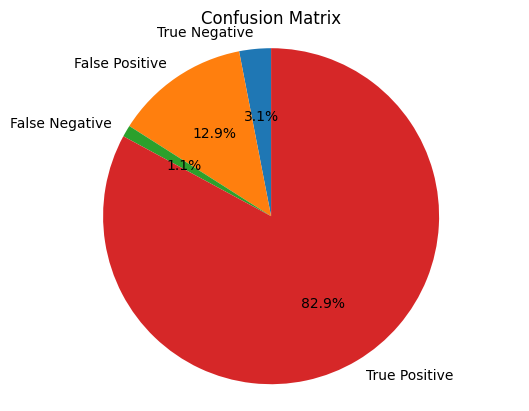

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# cm being the confusion matrix
cm_flat = cm.flatten()
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

plt.pie(cm_flat, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.title('Confusion Matrix')
plt.show()


[[  38  161]
 [  14 1032]]


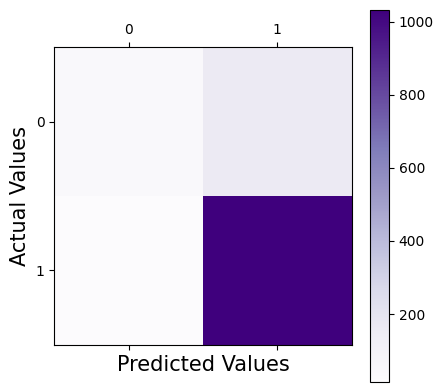

In [ ]:
plt.matshow(cm,cmap=plt.cm.Purples)
plt.colorbar()
plt.ylabel('Actual Values',fontsize=15)
plt.xlabel('Predicted Values',fontsize=15)
print(cm)